# Energy Consumption Analysis and Prediction

This notebook analyzes global and regional energy consumption (1965–2023) and produces forecasts for the next decade.

## `Import required libraries`

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

## `Loading the dataset`

In [2]:

df = pd.read_csv("NSDC_World_Energy_Consumption.csv")
df

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Total World,156.10,164.64,170.68,180.89,193.32,205.80,213.98,225.72,238.79,...,543.21,547.33,552.99,566.11,581.47,588.05,567.60,596.62,607.35,619.63
108,of which: OECD,110.23,115.84,120.28,128.10,136.79,144.71,148.42,156.22,164.97,...,232.88,233.43,234.62,237.13,240.65,238.53,221.91,232.56,233.55,229.90
109,Non-OECD,45.87,48.80,50.40,52.79,56.54,61.09,65.56,69.50,73.82,...,310.32,313.89,318.36,328.98,340.81,349.52,345.69,364.07,373.80,389.73


## `Data Cleaning & Preprocessing`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  103 non-null    object
 1   1965     103 non-null    object
 2   1966     103 non-null    object
 3   1967     103 non-null    object
 4   1968     103 non-null    object
 5   1969     103 non-null    object
 6   1970     103 non-null    object
 7   1971     103 non-null    object
 8   1972     103 non-null    object
 9   1973     103 non-null    object
 10  1974     103 non-null    object
 11  1975     103 non-null    object
 12  1976     103 non-null    object
 13  1977     103 non-null    object
 14  1978     103 non-null    object
 15  1979     103 non-null    object
 16  1980     103 non-null    object
 17  1981     103 non-null    object
 18  1982     103 non-null    object
 19  1983     103 non-null    object
 20  1984     103 non-null    object
 21  1985     103 non-null    object
 22  19

In [4]:
df.isnull().sum()

Country    8
1965       8
1966       8
1967       8
1968       8
1969       8
1970       8
1971       8
1972       8
1973       8
1974       8
1975       8
1976       8
1977       8
1978       8
1979       8
1980       8
1981       8
1982       8
1983       8
1984       8
1985       8
1986       8
1987       8
1988       8
1989       8
1990       8
1991       8
1992       8
1993       8
1994       8
1995       8
1996       8
1997       8
1998       8
1999       8
2000       8
2001       8
2002       8
2003       8
2004       8
2005       8
2006       8
2007       8
2008       8
2009       8
2010       8
2011       8
2012       8
2013       8
2014       8
2015       8
2016       8
2017       8
2018       8
2019       8
2020       8
2021       8
2022       8
2023       8
dtype: int64

In [5]:
# Handle missing values
df = df.dropna(how='all')
df


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
6,Argentina,1.18,1.22,1.26,1.30,1.34,1.27,1.35,1.37,1.43,...,3.53,3.59,3.57,3.57,3.54,3.34,3.13,3.45,3.71,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Total Asia Pacific,18.91,20.73,21.55,23.13,26.52,30.36,33.01,35.30,37.94,...,225.42,229.36,231.54,241.10,251.16,259.38,258.34,272.15,278.81,291.77
107,Total World,156.10,164.64,170.68,180.89,193.32,205.80,213.98,225.72,238.79,...,543.21,547.33,552.99,566.11,581.47,588.05,567.60,596.62,607.35,619.63
108,of which: OECD,110.23,115.84,120.28,128.10,136.79,144.71,148.42,156.22,164.97,...,232.88,233.43,234.62,237.13,240.65,238.53,221.91,232.56,233.55,229.90
109,Non-OECD,45.87,48.80,50.40,52.79,56.54,61.09,65.56,69.50,73.82,...,310.32,313.89,318.36,328.98,340.81,349.52,345.69,364.07,373.80,389.73


In [6]:
df = df.fillna(method='ffill').fillna(method='bfill')
df


C:\Users\jhasw\AppData\Local\Temp\ipykernel_3620\4191812960.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
6,Argentina,1.18,1.22,1.26,1.30,1.34,1.27,1.35,1.37,1.43,...,3.53,3.59,3.57,3.57,3.54,3.34,3.13,3.45,3.71,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Total Asia Pacific,18.91,20.73,21.55,23.13,26.52,30.36,33.01,35.30,37.94,...,225.42,229.36,231.54,241.10,251.16,259.38,258.34,272.15,278.81,291.77
107,Total World,156.10,164.64,170.68,180.89,193.32,205.80,213.98,225.72,238.79,...,543.21,547.33,552.99,566.11,581.47,588.05,567.60,596.62,607.35,619.63
108,of which: OECD,110.23,115.84,120.28,128.10,136.79,144.71,148.42,156.22,164.97,...,232.88,233.43,234.62,237.13,240.65,238.53,221.91,232.56,233.55,229.90
109,Non-OECD,45.87,48.80,50.40,52.79,56.54,61.09,65.56,69.50,73.82,...,310.32,313.89,318.36,328.98,340.81,349.52,345.69,364.07,373.80,389.73


In [7]:
# Convert columns to numeric type
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 1 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  103 non-null    object 
 1   1965     85 non-null     float64
 2   1966     86 non-null     float64
 3   1967     87 non-null     float64
 4   1968     87 non-null     float64
 5   1969     87 non-null     float64
 6   1970     87 non-null     float64
 7   1971     89 non-null     float64
 8   1972     89 non-null     float64
 9   1973     89 non-null     float64
 10  1974     89 non-null     float64
 11  1975     89 non-null     float64
 12  1976     89 non-null     float64
 13  1977     89 non-null     float64
 14  1978     89 non-null     float64
 15  1979     89 non-null     float64
 16  1980     89 non-null     float64
 17  1981     89 non-null     float64
 18  1982     89 non-null     float64
 19  1983     89 non-null     float64
 20  1984     89 non-null     float64
 21  1985     99 non-null 

In [9]:
df = df.fillna(method='ffill').fillna(method='bfill')
df

C:\Users\jhasw\AppData\Local\Temp\ipykernel_3620\539604750.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
6,Argentina,1.18,1.22,1.26,1.30,1.34,1.27,1.35,1.37,1.43,...,3.53,3.59,3.57,3.57,3.54,3.34,3.13,3.45,3.71,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Total Asia Pacific,18.91,20.73,21.55,23.13,26.52,30.36,33.01,35.30,37.94,...,225.42,229.36,231.54,241.10,251.16,259.38,258.34,272.15,278.81,291.77
107,Total World,156.10,164.64,170.68,180.89,193.32,205.80,213.98,225.72,238.79,...,543.21,547.33,552.99,566.11,581.47,588.05,567.60,596.62,607.35,619.63
108,of which: OECD,110.23,115.84,120.28,128.10,136.79,144.71,148.42,156.22,164.97,...,232.88,233.43,234.62,237.13,240.65,238.53,221.91,232.56,233.55,229.90
109,Non-OECD,45.87,48.80,50.40,52.79,56.54,61.09,65.56,69.50,73.82,...,310.32,313.89,318.36,328.98,340.81,349.52,345.69,364.07,373.80,389.73


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 1 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  103 non-null    object 
 1   1965     103 non-null    float64
 2   1966     103 non-null    float64
 3   1967     103 non-null    float64
 4   1968     103 non-null    float64
 5   1969     103 non-null    float64
 6   1970     103 non-null    float64
 7   1971     103 non-null    float64
 8   1972     103 non-null    float64
 9   1973     103 non-null    float64
 10  1974     103 non-null    float64
 11  1975     103 non-null    float64
 12  1976     103 non-null    float64
 13  1977     103 non-null    float64
 14  1978     103 non-null    float64
 15  1979     103 non-null    float64
 16  1980     103 non-null    float64
 17  1981     103 non-null    float64
 18  1982     103 non-null    float64
 19  1983     103 non-null    float64
 20  1984     103 non-null    float64
 21  1985     103 non-null

In [11]:
df.isnull().sum()


Country    0
1965       0
1966       0
1967       0
1968       0
1969       0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64

## `Exploratory Data Analysis (EDA)`

In [12]:

# Get basic statistics about the data
print("Data Statistics:")
df.describe()

Data Statistics:


,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,9.174854,9.622524,9.960874,10.566505,11.296019,12.024757,12.445049,13.105922,13.855825,13.896117,...,21.693107,21.862427,22.089320,22.607961,23.203786,23.449029,22.612718,23.769709,24.164272,24.626214
std,22.685142,23.818023,24.674272,26.181669,27.949005,29.657084,30.681672,32.303256,34.122367,34.084364,...,70.274826,70.850852,71.556338,73.378525,75.540826,76.629077,74.383237,78.230489,79.709331,81.742930
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.100000,0.110000,0.110000,0.110000,0.110000,0.110000,0.100000,0.100000,0.110000,0.120000
25%,0.235000,0.260000,0.265000,0.285000,0.300000,0.285000,0.285000,0.310000,0.330000,0.335000,...,1.020000,1.025000,1.090000,1.090000,1.130000,1.125000,1.015000,1.060000,1.085000,1.105000
50%,0.670000,0.700000,0.710000,0.770000,0.820000,0.870000,0.830000,0.870000,0.890000,0.960000,...,2.040000,2.130000,2.010000,2.040000,2.130000,2.250000,2.010000,2.130000,2.240000,2.220000
75%,3.340000,3.630000,3.930000,4.250000,4.570000,5.050000,5.310000,5.570000,5.820000,5.820000,...,6.480000,6.625000,6.695000,6.860000,7.210000,7.290000,6.830000,7.095000,7.185000,6.975000
max,156.100000,164.640000,170.680000,180.890000,193.320000,205.800000,213.980000,225.720000,238.790000,240.090000,...,543.210000,547.330000,552.990000,566.110000,581.470000,588.050000,567.600000,596.620000,607.350000,619.630000


In [13]:
# Identify regions of interest
regions = ['Total North America', 'Total S. & Cent. America', 'Total CIS', 'Total Europe', 'Total Asia Pacific', 'Total Middle East', 'Total Africa']
regional_data = df[df["Country"].isin(regions)]
# 'df.loc[regions]' selects the rows corresponding to the specified regions

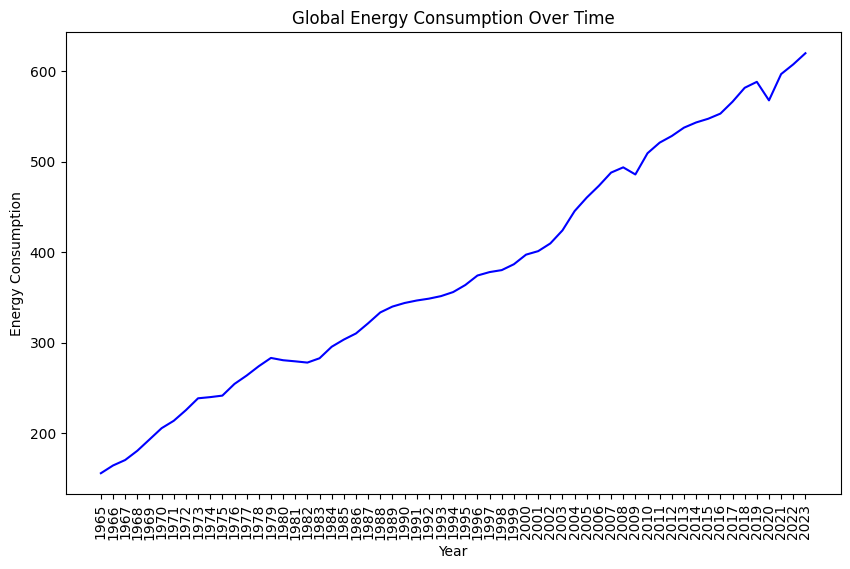

In [14]:
# Global Energy Consumption Trend Over Time
plt.figure(figsize=(10, 6))
world_data = df[df["Country"] == "Total World"].iloc[0, 1:]  # skip "Country" column
plt.plot(df.columns[1:], world_data, color='blue')
plt.title("Global Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.xticks(rotation=90)
plt.show()


In [15]:
world_data

1965     156.1
1966    164.64
1967    170.68
1968    180.89
1969    193.32
1970     205.8
1971    213.98
1972    225.72
1973    238.79
1974    240.09
1975    241.75
1976    254.68
1977    263.89
1978    274.22
1979    283.33
1980    280.81
1981    279.58
1982     278.2
1983    282.97
1984    295.67
1985     303.6
1986    310.35
1987    321.57
1988    333.55
1989    340.01
1990    343.96
1991    346.71
1992    348.75
1993    351.56
1994    356.03
1995    363.81
1996    374.29
1997    378.08
1998    380.27
1999    386.74
2000    397.33
2001     401.2
2002    409.71
2003    424.12
2004    445.42
2005    460.35
2006    473.36
2007    487.88
2008    493.67
2009    485.83
2010    509.25
2011    520.95
2012    528.28
2013    537.48
2014    543.21
2015    547.33
2016    552.99
2017    566.11
2018    581.47
2019    588.05
2020     567.6
2021    596.62
2022    607.35
2023    619.63
Name: 107, dtype: object

In [16]:
world_df = world_data.reset_index()
world_df.columns = ["Year", "Energy_Consumption"]

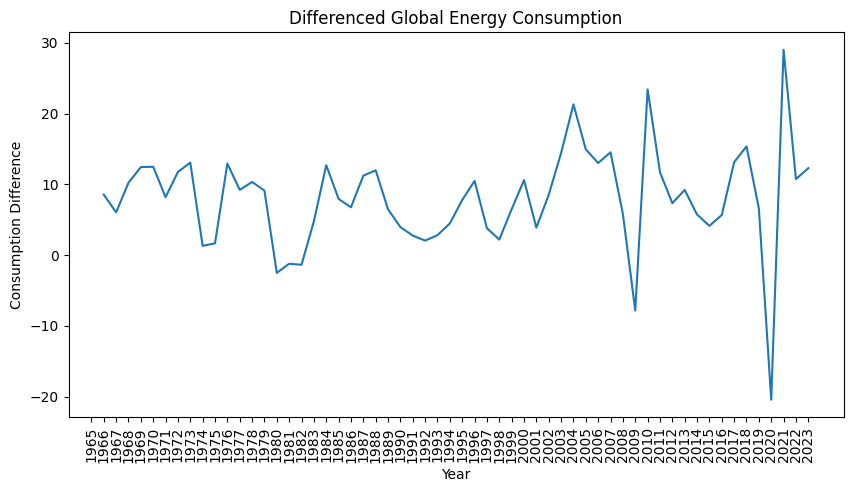

In [17]:
world_df['Consumption_Diff'] = world_df['Energy_Consumption'].diff().dropna()

# Plot the differenced data to confirm stationarity
plt.figure(figsize=(10, 5))
plt.plot(world_df['Year'].iloc[:], world_df['Consumption_Diff'])
plt.title('Differenced Global Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption Difference')
plt.xticks(rotation=90)
plt.show()

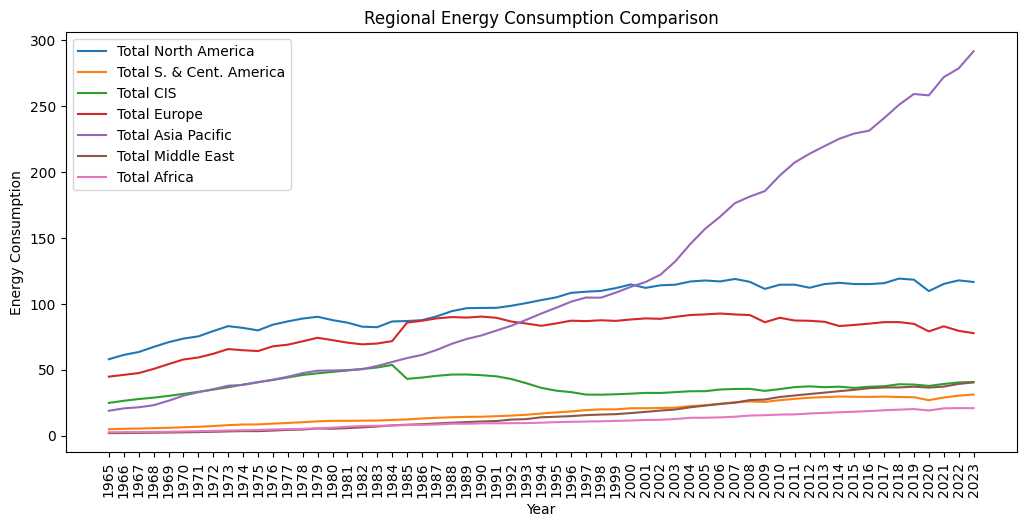

In [18]:
# Energy Consumption Comparison Across Regions
plt.figure(figsize=(27, 12))
plt.subplot(2, 2, 2)
for region in regions:
    row = df[df["Country"] == region].iloc[0, 1:]   # skip "Country" column
    plt.plot(df.columns[1:], row, label=region)
plt.legend()
plt.title("Regional Energy Consumption Comparison")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.xticks(rotation=90)
plt.show()
# 'plt.plot' creates a line plot for each region's energy consumption over time

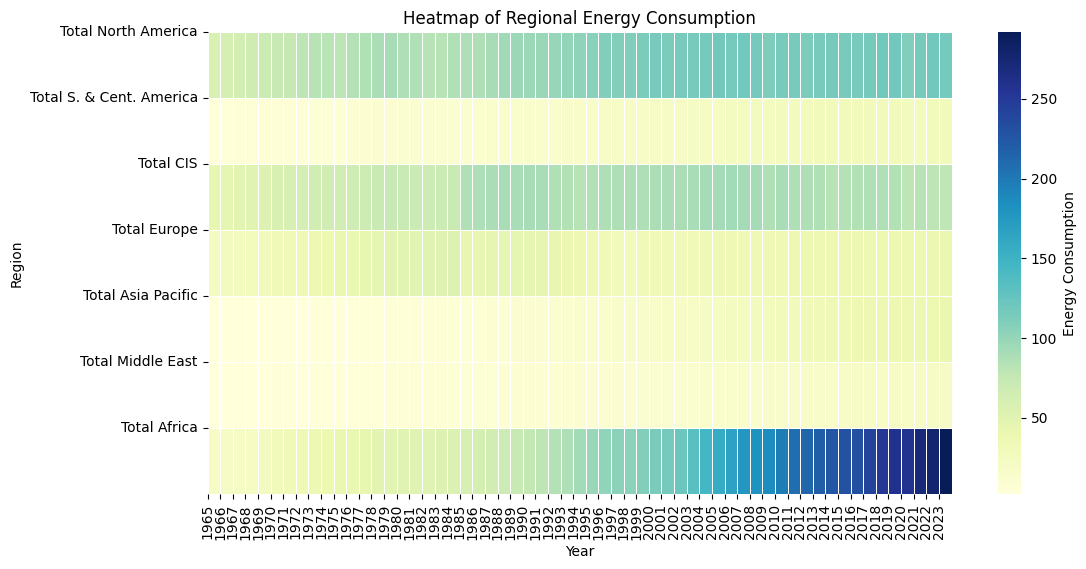

In [19]:
plt.figure(figsize=(12, 6))
heatmap_data = df[df["Country"].isin(regions)].iloc[:, 1:]
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=.5, cbar_kws={'label': 'Energy Consumption'})
plt.title('Heatmap of Regional Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Region')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(range(len(regions)), regions, rotation=0)
plt.show()

## `Training and Evaluating`

In [21]:

world_df["Lag1"] = world_df["Energy_Consumption"].shift(1)
world_df["Lag2"] = world_df["Energy_Consumption"].shift(2)
world_df["Rolling3"] = world_df["Energy_Consumption"].rolling(3).mean()
world_df = world_df.dropna()
world_df

,Year,Energy_Consumption,Consumption_Diff,Lag1,Lag2,Rolling3
2,1967,170.68,6.04,164.64,156.1,163.806667
3,1968,180.89,10.21,170.68,164.64,172.070000
4,1969,193.32,12.43,180.89,170.68,181.630000
5,1970,205.8,12.48,193.32,180.89,193.336667
6,1971,213.98,8.18,205.8,193.32,204.366667
7,1972,225.72,11.74,213.98,205.8,215.166667
8,1973,238.79,13.07,225.72,213.98,226.163333
9,1974,240.09,1.3,238.79,225.72,234.866667
10,1975,241.75,1.66,240.09,238.79,240.210000
11,1976,254.68,12.93,241.75,240.09,245.506667


In [22]:
# Convert Year to int
world_df["Year"] = world_df["Year"].astype(int)

X = world_df[["Year","Lag1","Lag2","Rolling3"]]
y = world_df['Energy_Consumption']

# Chronological split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [23]:
results = {}
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [24]:
model = LinearRegression()
evaluate_model("LinearRegression", model)

model = DecisionTreeRegressor(random_state=42)
evaluate_model("DecisionTree", model)

model = RandomForestRegressor(random_state=42, n_estimators=100)
evaluate_model("RandomForest", model)

In [25]:
poly = PolynomialFeatures(degree=2)   # you can tune the degree

X_poly=poly.fit_transform(world_df[["Year"]])
X_train_p,X_test_p,y_train_p,y_test_p=train_test_split(X_poly,y,test_size=0.2,shuffle=False)
poly_reg=LinearRegression().fit(X_train_p,y_train_p)
y_pred_p=poly_reg.predict(X_test_p)

mae = mean_absolute_error(y_test_p, y_pred_p)
mse = mean_squared_error(y_test_p, y_pred_p)
rmse = root_mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

results["PolynomialRegression(d2)"] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [26]:
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2
LinearRegression,1.136868e-13,2.584939e-26,1.607775e-13,1.000000
DecisionTree,4.872667e+01,3.154527e+03,5.616518e+01,-3.043027
RandomForest,5.664427e+01,3.988812e+03,6.315704e+01,-4.112296
PolynomialRegression(d2),7.758287e+00,9.848517e+01,9.923969e+00,0.873776


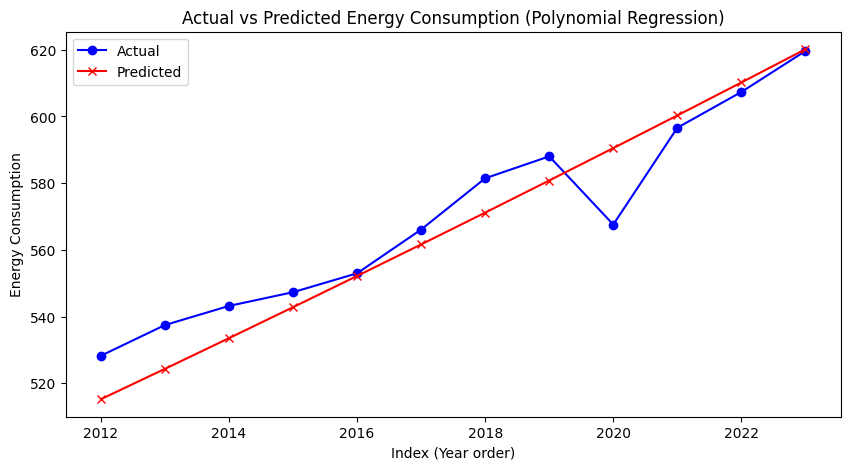

In [27]:
plt.figure(figsize=(10,5))
plt.plot(world_df.loc[y_test.index, "Year"], y_test, label="Actual", marker="o", color='blue')
plt.plot(world_df.loc[y_test.index, "Year"], y_pred_p, label="Predicted", marker="x", color='red')
plt.xlabel("Index (Year order)")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption (Polynomial Regression)")
plt.legend()
plt.show()

In [28]:

poly_reg.fit(X_poly, y)

# Create future years
last_year = world_df['Year'].max()
future_years = pd.DataFrame({"Year": range(last_year+1, last_year+11)})

future_poly = poly.transform(future_years)
future_preds = poly_reg.predict(future_poly)

forecast_df = pd.DataFrame({
    "Year": future_years['Year'],
    "Forecasted_Energy_Consumption": future_preds
})

forecast_df

,Year,Forecasted_Energy_Consumption
0,2024,631.244269
1,2025,641.365724
2,2026,651.571423
3,2027,661.861366
4,2028,672.235553
5,2029,682.693983
6,2030,693.236658
7,2031,703.863576
8,2032,714.574738
9,2033,725.370144


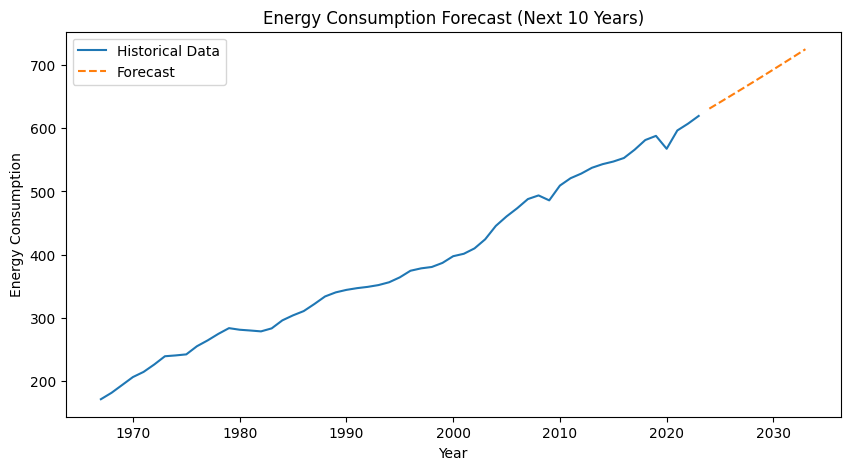

In [29]:
plt.figure(figsize=(10,5))
plt.plot(world_df['Year'], world_df['Energy_Consumption'], label="Historical Data")
plt.plot(forecast_df['Year'], forecast_df['Forecasted_Energy_Consumption'], label="Forecast", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (Next 10 Years)")
plt.legend()
plt.show()